Forest fires are a huge environmental hazard that cause economic and ecological harm as well as putting human lives in danger. Controlling such a phenomenon requires quick notice. One option is to use automated techniques based on local sensors, such as those given by meteorological stations, to do this. In fact, meteorological variables (such as temperature and wind) are known to impact forest fires, and various fire indices, such as the Forest Fire Weather Index (FWI), rely on this information.

DATASET DESCRIPTION:

In [ ]:
# Importing numpy, pandas and matplotlib libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('forestfires.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Since the column names are already consistent, we don't have anything to change

In [ ]:
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
# Lets calculate the total missing values in our data
total = dataset.isnull().sum().sort_values(ascending = False)

In [ ]:
# Lets calculate the percentage of missing values
perc = ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending = False)

In [ ]:
missing_data = pd.concat([total, perc], axis = 1, keys = ["Total", "Percentage %"])

In [ ]:
missing_data

,Total,Percentage %
area,0,0.0
rain,0,0.0
wind,0,0.0
RH,0,0.0
temp,0,0.0
ISI,0,0.0
DC,0,0.0
DMC,0,0.0
FFMC,0,0.0
day,0,0.0


We find that there are no missing values in our data.

In [ ]:
# finding correlation matrix of numerical columns in training data set
dataset.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


Visualization

In [ ]:
# importing seaborn library for visualization
import seaborn as sns

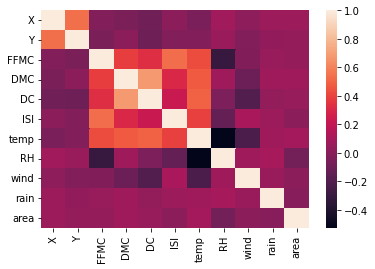

In [ ]:
# heatmap of correlation matrix
sns.heatmap(dataset.corr())

Text(0.5, 1.0, 'Variation in tempertaure with months')

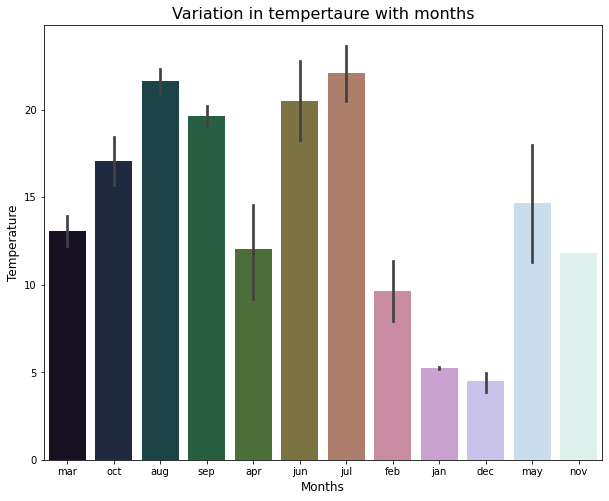

In [ ]:
# scatter plot of month and temperature
plt.figure(figsize= (10, 8))
sns.barplot(y = dataset.temp.values, x = dataset.month.values,palette = "cubehelix")
plt.xlabel("Months", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.title("Variation in tempertaure with months", fontsize = 16)

In [ ]:
days1 =dataset["day"].value_counts().head(10)
days1


3    95
0    85
2    84
1    74
5    64
4    61
6    54
Name: day, dtype: int64

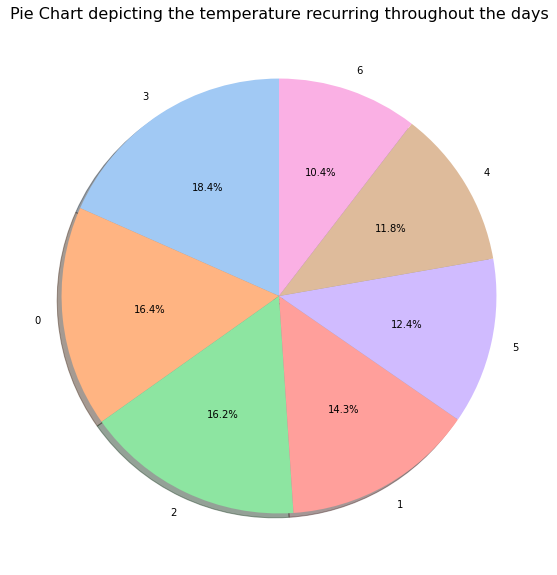

In [ ]:
# How do i get the labels?????????????
plt.figure(figsize = (10, 10))
plt.pie(days1, labels = days1.index, colors = sns.color_palette('pastel')[0:10], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Pie Chart depicting the temperature recurring throughout the days", fontsize = 16)
plt.show()

The temperatures were the highest around Sundays

Count based on Days

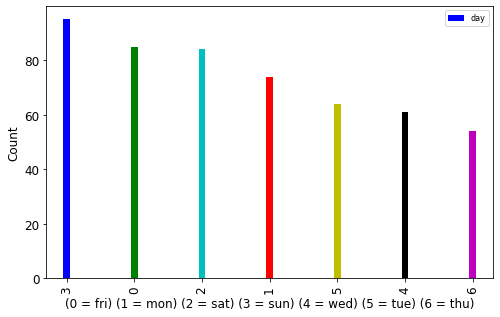

In [ ]:
dataset.day.value_counts() \
    .plot(kind="bar", width=0.1, legend=1, figsize=(8, 5), color=['b', 'g', 'c', 'r', 'y', 'k', 'm'] )
plt.xlabel("(0 = fri) (1 = mon) (2 = sat) (3 = sun) (4 = wed) (5 = tue) (6 = thu)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.show()

Plotting boxplots to see how the months and days have affected the results

In [ ]:
# Transforimg area by taking it's logarithm
# Adding 1 to avoid the zeros
dataset['log_area'] = np.log10(dataset['area']+1)

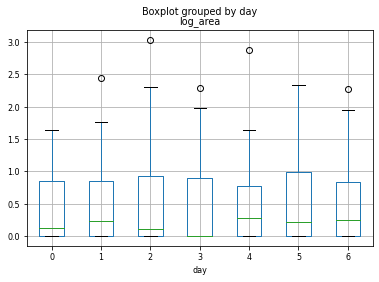

In [ ]:
dataset.boxplot(column='log_area',by = 'day')

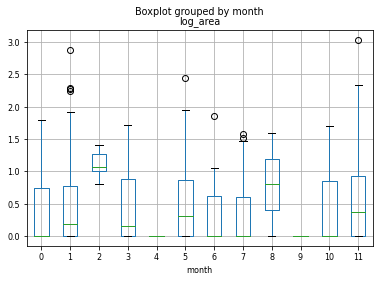

In [ ]:
dataset.boxplot(column= 'log_area', by = 'month')

As we can observe through the boxplot, there a quite a few number of outliers in this dataset

Extracting Mean, Squared Error, and Worst Features column

In [ ]:
dataset_mean_cols = list(dataset.columns[1:11])
dataset_se_cols = list(dataset.columns[11:21])
dataset_worst_cols = list(dataset.columns[21:])

In [ ]:
dfS = dataset[dataset['day'] == 3]
dfM = dataset[dataset['day'] == 1]
dfT = dataset[dataset['day'] == 5]
dfW = dataset[dataset['day'] == 4]
dfTH = dataset[dataset['day'] == 6]
dfF = dataset[dataset['day'] == 0]
dfSA = dataset[dataset['day'] == 2]

Distribution based on Days of the week and 

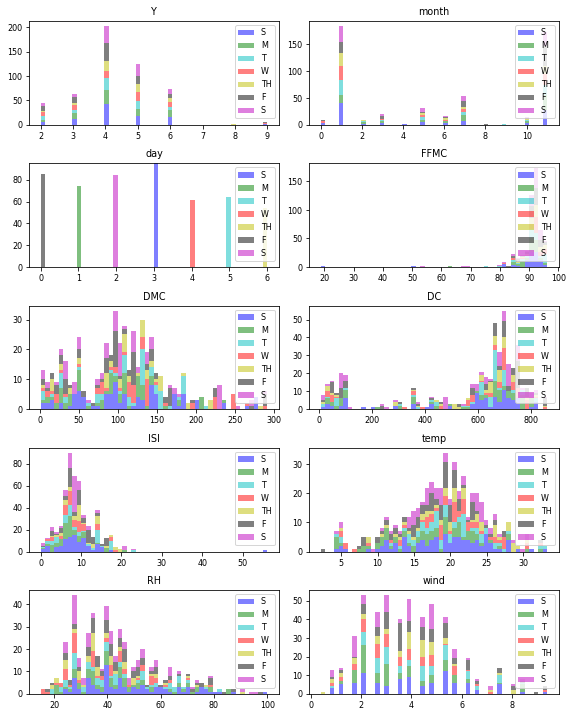

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
  ax.figure
  binwidth = (max(dataset[dataset_mean_cols[idx]]) - min(dataset[dataset_mean_cols[idx]])) / 50
  ax.hist([dfS[dataset_mean_cols[idx]], dfM[dataset_mean_cols[idx]], dfT[dataset_mean_cols[idx]], dfW[dataset_mean_cols[idx]], dfTH[dataset_mean_cols[idx]], dfF[dataset_mean_cols[idx]], dfSA[dataset_mean_cols[idx]]],
          bins=np.arange(min(dataset[dataset_mean_cols[idx]]), max(dataset[dataset_mean_cols[idx]]) + binwidth, binwidth), alpha=0.5,
          stacked=True, label=['S', 'M', 'T', 'W', 'TH', 'F', 'S'], color=['b', 'g', 'c', 'r', 'y', 'k', 'm'])
  ax.legend(loc='upper right')
  ax.set_title(dataset_mean_cols[idx])
plt.tight_layout()
plt.show()

In [ ]:
cat_cols = ["month", "day"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
 dataset[col] = le.fit_transform(dataset[col])

dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
dataset.area.value_counts(ascending=False).head(5)

0.00    247
1.94      3
3.71      2
0.90      2
1.95      2
Name: area, dtype: int64

In [ ]:
#X,y = dataset.drop('area',axis=1).values, dataset['area'].values
X,y = dataset.values, dataset['area'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

logged_y_train = np.log1p(y_train)
logged_y_test = np.log1p(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
def model(n,m,x,y):
    m.fit(x,y)
    predict=m.predict(x)
    train_rmse=np.sqrt(mean_squared_error(y,m.predict(x)))
    test_rmse=np.sqrt(mean_squared_error(logged_y_test,m.predict(scaled_X_test)))
    print("{} TRAIN_RMSE = {} || TEST_RMSE = {}".format(n,train_rmse,test_rmse))
    return m

Linear Regression TRAIN_RMSE = 1.160281617522523 || TEST_RMSE = 1.3106583338049091
Lasso TRAIN_RMSE = 1.2196183583333324 || TEST_RMSE = 1.288036635335433
Ridge TRAIN_RMSE = 1.160281815828786 || TEST_RMSE = 1.3105848756057443
Elastic Net TRAIN_RMSE = 1.20402190685918 || TEST_RMSE = 1.2724910955522273
SVR TRAIN_RMSE = 0.9560371899873834 || TEST_RMSE = 1.2311713778907054
Random Forest Regressor TRAIN_RMSE = 0.044069125162059776 || TEST_RMSE = 0.03614817846610198


<function matplotlib.pyplot.show>

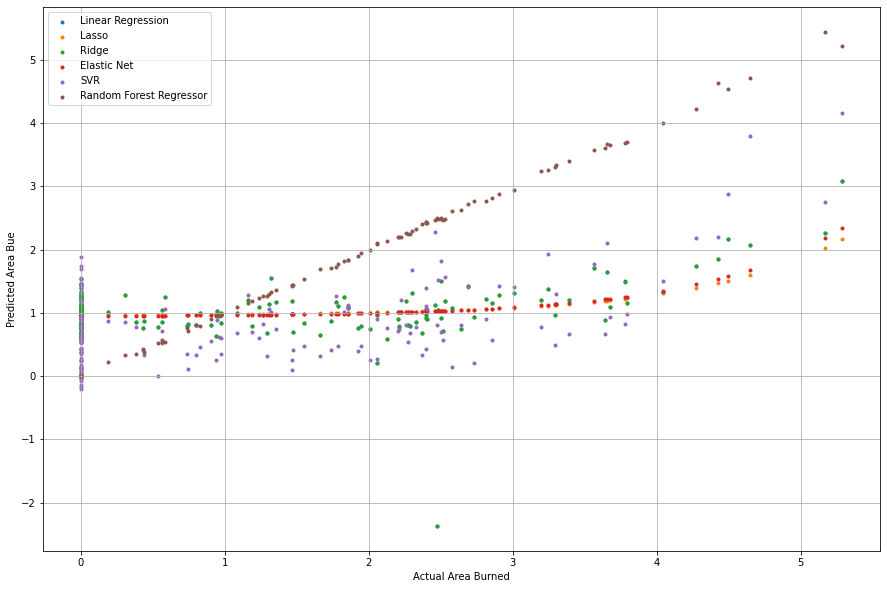

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
reg_dict={"Linear Regression":LinearRegression(),
          "Lasso":Lasso(alpha=0.3,random_state=6),
          "Ridge":Ridge(alpha=0.3,random_state=6),
          "Elastic Net":ElasticNet(alpha=0.3),
          "SVR":SVR(kernel='rbf', degree=2, C=1),
          "Random Forest Regressor":RandomForestRegressor(n_estimators=10, random_state=6)}
model_list=list()
fig=plt.figure(figsize=(15,10))
sub=fig.add_subplot(1,1,1)
for key,value in reg_dict.items():
    m=model(key,value,scaled_X_train,logged_y_train)
    model_list.append(m)
    sub.scatter(logged_y_test,m.predict(scaled_X_test),label=key,marker='.')
    sub.set_xlabel("Actual Area Burned")
    sub.set_ylabel("Predicted Area Bue")
plt.legend(loc='best')
plt.grid(True)
plt.show

<Figure size 432x288 with 0 Axes>

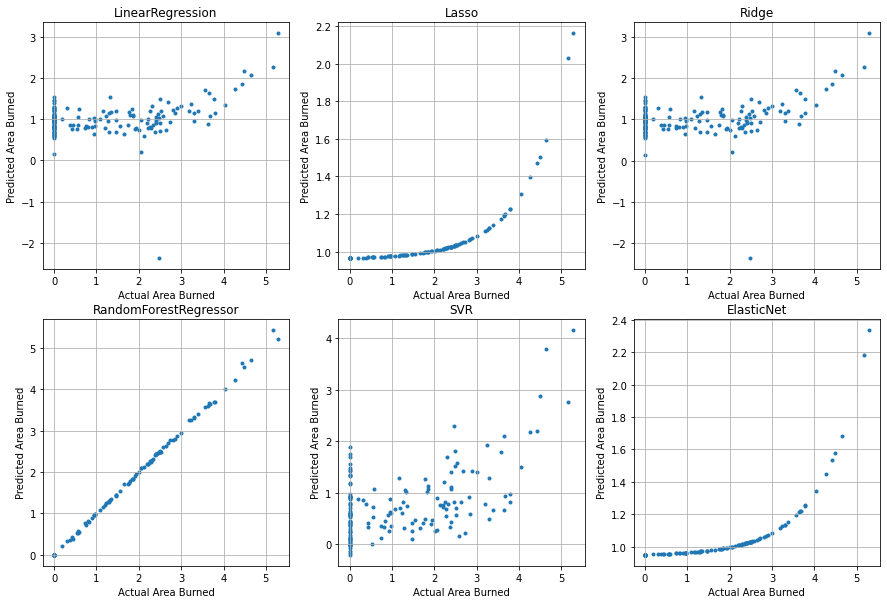

In [ ]:
fig=plt.figure()
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
for num,model in enumerate(model_list):
    if(num<=2):
        ax[0,num].scatter(logged_y_test,model.predict(scaled_X_test),marker='.')
        ax[0,num].set_title(str(model).split('(')[0])
        ax[0,num].set_xlabel("Actual Area Burned")
        ax[0,num].set_ylabel("Predicted Area Burned")
        ax[0,num].grid(True)
    else:
        ax[1,len(model_list)-(num+1)].scatter(logged_y_test,model.predict(scaled_X_test),marker='.')
        ax[1,len(model_list)-(num+1)].set_title(str(model).split("(")[0])
        ax[1,len(model_list)-(num+1)].set_xlabel("Actual Area Burned")
        ax[1,len(model_list)-(num+1)].set_ylabel("Predicted Area Burned")
        ax[1,len(model_list)-(num+1)].grid(True)

In [ ]:
tol_max=20 # the maximum tolerance limit for the REC curve
def rec(m,n,tol):
  if type(m)!='numpy.ndarray':
    m=np.array(m)
  if type(n)!='numpy.ndarray':
    n=np.array(n)
  l=m.size
  percent = 0
  for i in range(l):
    if np.abs(10**m[i]-10**n[i])<=tol:
      percent+=1
  return 100*(percent/l)

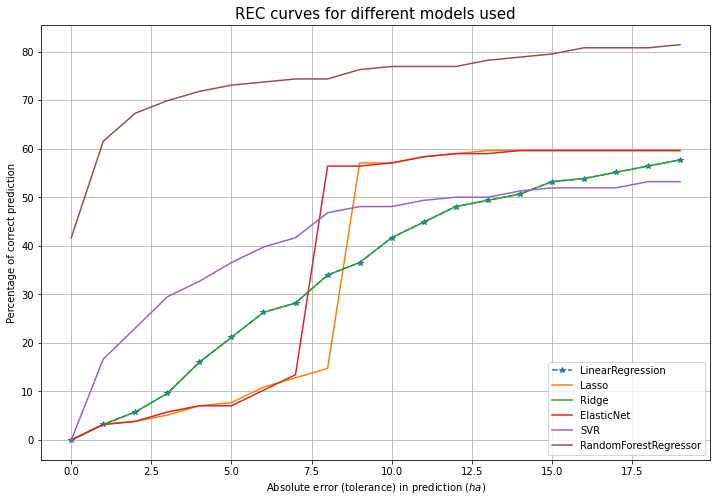

In [ ]:
model_list_rec=dict()
for model in model_list:
  rec_data=list()
  for i in range(tol_max):
    rec_data.append(rec(model.predict(scaled_X_test),logged_y_test,i))
  model_list_rec.setdefault(str(model).split("(")[0],rec_data)

fig=plt.figure(figsize=(12,8))
sub=fig.add_subplot(1,1,1)

for key,recd in model_list_rec.items():
  #print("{} {}".format(key,recd))
  if(key=="LinearRegression"):
    sub.plot(range(tol_max),recd,label=key,linestyle='--',marker='*')
  else:
    sub.plot(range(tol_max),recd,label=key)

plt.title("REC curves for different models used",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
dataset.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

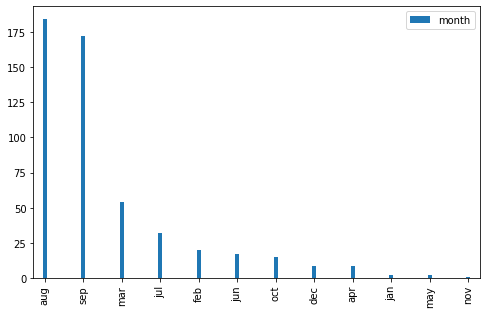

In [ ]:
dataset.month.value_counts() \
    .plot(kind="bar", width=0.1, legend=1, figsize=(8, 5))

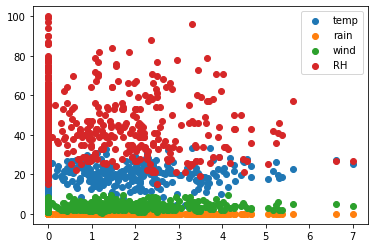

In [ ]:
area=np.log1p(dataset.area.values)
plt.scatter(area,dataset.temp.values,label="temp")
plt.scatter(area,dataset.rain.values,label="rain")
plt.scatter(area,dataset.wind.values,label="wind")
plt.scatter(area,dataset.RH.values,label="RH")
plt.legend(loc="best")